In [1]:
# Import pandas 
import pandas as pd 
        
# Read csv file  any
table = pd.read_csv("../../csv/usa.csv") 
un = pd.read_csv("./un.csv") 
pop = pd.read_csv("./pop.csv") 

zipcodes = pd.read_csv("../../csv/free-zipcode-database-Primary.csv") 

table_n = table.shape[0]


In [2]:
import spacy
import contextualSpellCheck

nlp = spacy.load('en_core_web_sm')
# contextualSpellCheck.add_to_pipe(nlp)
doc = nlp('Income was $9.4 milion compared to the prior year of $2.7 milion.')

print(doc._.performed_spellCheck) #Should be True
print(doc._.outcome_spellCheck) #Income was $9.4 million compared to the prior year of $2.7 million.

AttributeError: [E046] Can't retrieve unregistered extension attribute 'performed_spellCheck'. Did you forget to call the `set_extension` method?

In [ ]:

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

### Geographical Data analysis

In [ ]:
popdict = {}
for i in range(pop.shape[0]):
    code = (us_state_abbrev[pop["State"][i]])
    popdict[code] = int(pop["July 2019 Estimate"][i].replace(",",""))

In [ ]:
import requests
loc_data ={}
for i in range(0,table_n):
    code_ = int(table["p"][i])
    loc_data[code_] = zipcodes[zipcodes["Zipcode"]==code_][:].iloc(0)

In [ ]:
loc_data[95605][0]["City"]

In [ ]:
cities = {}
for i in range(0,table_n):
    code_ = int(table["p"][i])
    if loc_data[code_][:].size == 0:
        continue
    city = str(loc_data[code_][0]["State"])
    
    if city in cities:
        cities[city]+=1
    else:
        cities[city] = 1

In [ ]:
orders = cities

sort_orders = sorted(orders.items(), key=lambda x: x[1], reverse=True)


In [ ]:
undict = {}
for i in range(un.shape[0]):
    undict[us_state_abbrev[un["State"][i]]] = un["rate"][i]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))

plt.bar([z[0] for z in sort_orders ],[z[1] for z in sort_orders ])
plt.title('title name')
plt.show()


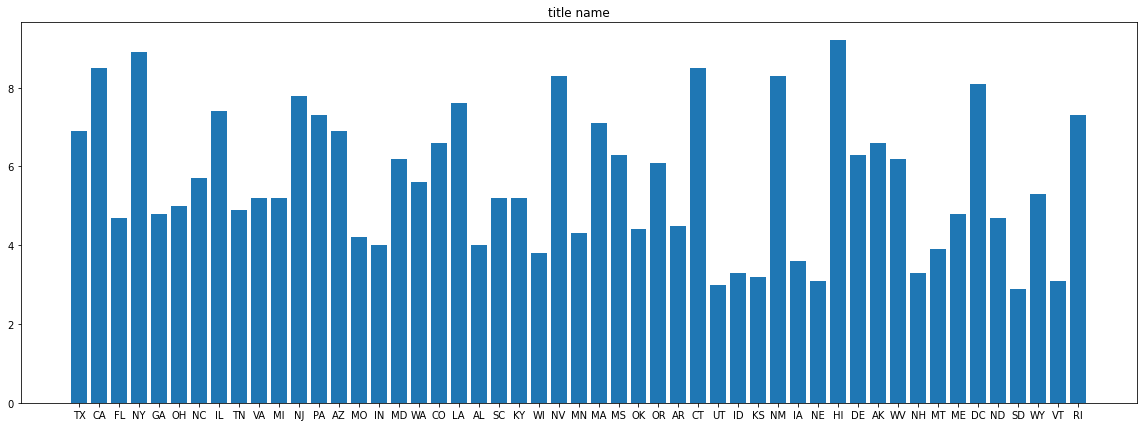

In [27]:
plt.figure(figsize=(20, 7))

plt.bar([z[0] for z in sort_orders ],[undict[z[0]] for z in sort_orders ])
plt.title('title name')

plt.show()


In [28]:
import numpy as np

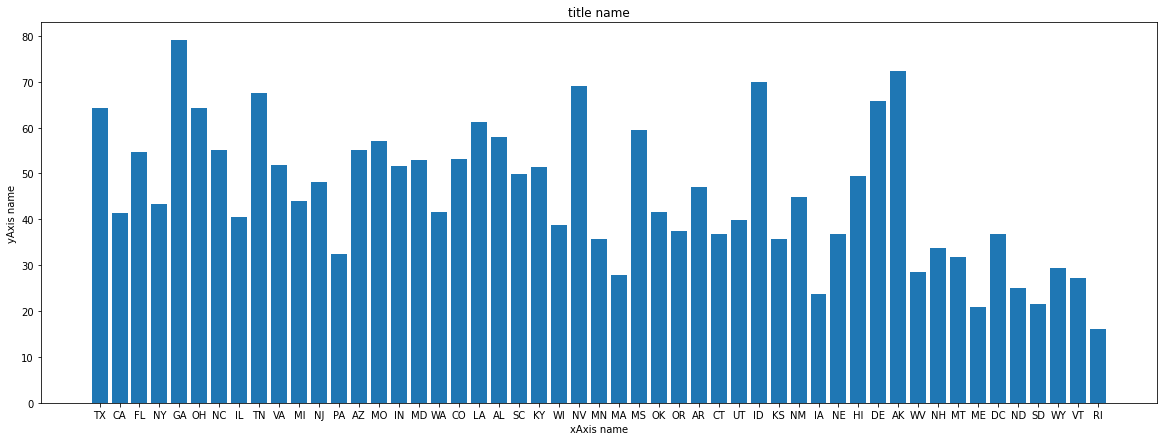

In [30]:

plt.figure(figsize=(20, 7))

plt.bar([z[0] for z in sort_orders ],[float(z[1])*1000000/float(popdict[z[0]]) for z in sort_orders ])


plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

In [31]:
y= np.array([int(float(z[1])*1000000/float(popdict[z[0]])) for z in sort_orders ])
x = np.array([z[0] for z in sort_orders])

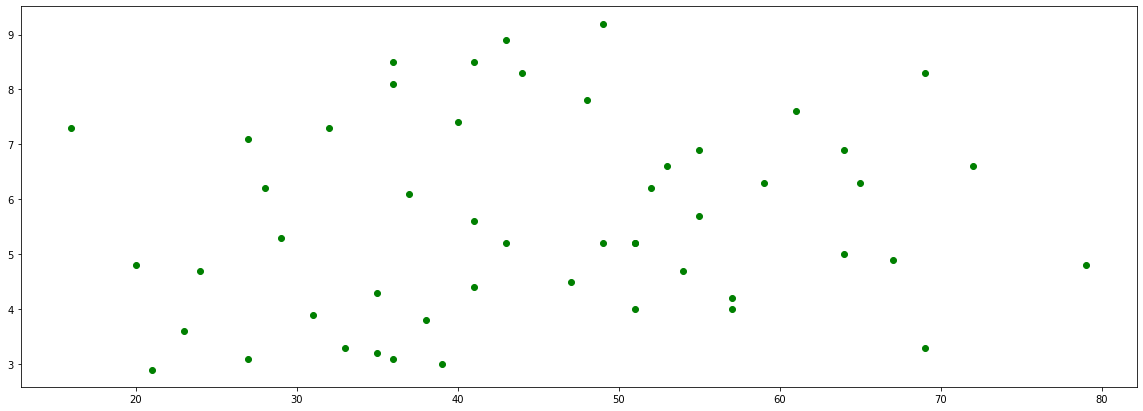

In [33]:
plt.figure(figsize=(20, 7))

plt.scatter(y, [undict[z[0]] for z in sort_orders ], color='green')
plt.show()

### Linguistic Analysis

In [34]:
import numpy as np
import matplotlib.pyplot as plt
np.version.version

import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
# nltk.download('averaged_perceptron_tagger')

def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent


In [35]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
import math


In [36]:
count = 0
for i in range(table_n):
    if str(table["Description"][i]).lower().find("i received")>-1:
        count+=1
count

3722

In [37]:
from spacy.matcher import Matcher  


In [38]:
def rule1(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        
        # if the token is a verb
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                    # add subject to the phrase
                    phrase += sub_tok.text

                    # save the root of the verb in phrase
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        # save the object in the phrase
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                                    
                            phrase += ' '+sub_tok.text
                            sent.append(phrase)
            
    return sent
def rule2(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        
        # if the token is a verb
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                    # add subject to the phrase
                    phrase += sub_tok.text

                    # save the root of the verb in phrase
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    sent.append(phrase)
            
    return sent
def rule3(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        
        # if the token is a verb
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.rights:
                
                if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    # save the root of the verb in phrase
                    
                    phrase += token.lemma_ 
                    # add subject to the phrase
                    phrase += ' '+sub_tok.text

                    # check for noun or pronoun direct objects
                    sent.append(phrase)
            
    return sent
stir = "please contact us via email".lower()
print(rule3(stir))
doc = nlp("The company emailed me from several different email addresse".lower())
displacy.render(doc, style='dep',jupyter=True)

['contact us']


In [11]:
list_= []
list_via = []
dict_ ={}
count = 0
for i in range(table_n):
    if i%100 == 0 :
        print(i)
    desc = table["Description"][i]
    phrases = rule1(str(desc).lower())
    words = str(desc).lower().split()
    
    if "via" in words:
        ind = words.index("via")
        if ind == len(words)-1:
            pass
        else:
            list_via.append(words[ind+1])
            if words[ind+1] in dict_:
                dict_[words[ind+1]] +=1
            else:
                dict_[words[ind+1]] = 1
        count+=1
        print(str(count)+" "+str(ind))
    else:
        for sent in phrases:
            n1, v, n2 = sent.split()[0], sent.split()[1], sent.split()[2].lower()
            if v == "receive" or v == "get":
                list_.append([n1,v,n2])
                if n2 in dict_:
                    dict_[n2] +=1
                else:
                    dict_[n2] = 1
                count+=1
                print(count)
                break
count

0
1
2 75
3 8
4
5
6
7
8 42
9
10
11
12 48
13 428
14
15 4
16
17
18
19
20
21 54
22 20
23
24 81
25
26
27
28 44
29 147
30 8
31 8
32 601
33 28
34
35 449
36 71
37
38 63
39 29
40
41
42
43
44
45
46 28
47 4
48 46
49
50
51
100
52
53
54
55 73
56
57 23
58 65
59 16
60
61 3
62
63 7
64
65
66 3
67 3
68 50
69
70
71
72 369
73
74
75
76
77
78
79
80
81
82
83
84
85
86 3
87
88
89
90
91
92
93
94
95
96 4
97 164
98
99
100
101
102
103 59
104 173
105 815
200
106
107
108 191
109
110
111 3
112 59
113
114 134
115
116
117 100
118
119 13
120
121 34
122
123
124
125
126 4
127
128 289
129
130 49
131 2
132
133
134
135
136
137 33
138 3
139 281
140 81
141
142
143
144 109
145 387
146
147
148
300
149 38
150 3
151
152
153
154 92
155 3
156 4
157 4
158 2
159 608
160 118
161
162 3
163
164 11
165 125
166
167 9
168
169
170
171
172
173
174
175
176 52
177
178
179 458
180
181
182
183
184 3
185 201
186 11
187
188
189 12
190
191 14
192
193 20
194 498
195
196
197 68
400
198
199
200
201
202 18
203
204
205 5
206 213
207
208 3
209 14
210 22
2

1481
1482
1483 99
1484
1485
1486
1487 89
1488
1489
1490 81
1491
1492
1493
1494
1495 22
1496 7
1497 25
1498 5
1499
1500 40
1501
1502 36
1503
2800
1504
1505 52
1506 47
1507 4
1508
1509 28
1510
1511
1512
1513
1514 536
1515
1516
1517
1518 3
1519 17
1520 2
1521
1522
1523 39
1524
1525
1526 32
1527
1528 2
1529
1530 111
1531
1532 180
1533 19
1534
1535
1536 96
1537
1538
1539 233
1540
1541
1542
1543 170
1544
1545
1546 3
1547
1548 21
1549 88
1550 18
1551
1552
1553
1554 155
1555
1556
1557 98
1558
1559
2900
1560
1561
1562 144
1563
1564 83
1565
1566 48
1567
1568 29
1569
1570 484
1571 34
1572
1573 51
1574
1575
1576 13
1577
1578 149
1579 93
1580
1581
1582 130
1583 92
1584
1585
1586
1587 29
1588 70
1589 6
1590
1591 20
1592
1593 1
1594 217
1595
1596
1597 84
1598 4
1599
1600 3
1601
1602
1603 401
1604
1605
1606 5
1607 43
1608
1609 87
1610
1611
1612
1613 818
1614 26
1615
1616
3000
1617 818
1618 26
1619 33
1620 95
1621
1622
1623 40
1624
1625 1
1626
1627
1628
1629
1630
1631
1632 8
1633 129
1634
1635 5
1636 9

2794 55
2795
2796 4
2797
2798
2799
2800
2801 32
2802 63
2803
2804
2805 5
2806
2807
2808
2809
2810 58
2811
2812 27
2813
2814
2815 1
2816
2817
2818 68
2819
2820
2821 145
2822 8
2823
2824
2825 2
2826 3
2827 140
2828 254
2829
5300
2830 879
2831 5
2832
2833 13
2834
2835
2836 86
2837 43
2838
2839 5
2840
2841
2842
2843
2844
2845 3
2846 629
2847 100
2848
2849
2850 84
2851
2852
2853
2854 83
2855
2856
2857
2858
2859
2860
2861
2862 211
2863
2864
2865
2866
2867
2868 39
2869 14
2870
2871 20
2872 231
2873
2874 70
2875 124
2876 4
2877 82
2878 69
2879 12
2880 39
2881 127
2882
2883
5400
2884
2885
2886
2887 42
2888
2889 550
2890
2891
2892 3
2893
2894
2895
2896 67
2897 411
2898 10
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909 18
2910 224
2911
2912 44
2913 795
2914
2915 266
2916
2917
2918
2919 5
2920
2921 240
2922 424
2923 107
2924 75
2925
2926
2927
2928
2929
2930 5
2931 2
2932 5
2933 3
5500
2934
2935
2936
2937
2938
2939
2940 40
2941 179
2942
2943
2944 70
2945
2946
2947 195
2948 42
2949
2950
2951

4091 7
4092 278
4093
4094
4095 654
4096
7700
4097 266
4098
4099
4100 34
4101
4102 85
4103 4
4104
4105 43
4106 3
4107 21
4108
4109
4110
4111 20
4112 31
4113
4114
4115
4116
4117
4118
4119
4120 97
4121 62
4122 712
4123
4124
4125 59
4126 34
4127 22
4128
4129
4130
4131
4132 159
4133
4134
4135
4136
4137 270
4138 25
4139
4140
7800
4141 36
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154 3
4155 53
4156 13
4157 222
4158 28
4159
4160
4161
4162
4163
4164
4165 313
4166
4167
4168
4169
4170 11
4171
4172
4173
4174
4175
4176
4177
4178 16
4179 45
4180
4181 23
4182
4183
4184 144
4185
4186
4187
7900
4188 41
4189
4190
4191
4192
4193
4194
4195
4196 4
4197 247
4198
4199
4200 2
4201
4202 150
4203
4204
4205 14
4206
4207
4208
4209 288
4210 68
4211 17
4212
4213 118
4214 96
4215
4216 23
4217
4218 348
4219
4220
4221
4222 4
4223
4224 147
4225
4226
4227
4228
4229 11
4230
4231
4232 11
4233 55
4234
4235
4236
4237
8000
4238 64
4239
4240 12
4241 55
4242
4243 82
4244 9
4245 117
4246
4247
4248 55
4249 83


5398
5399
5400
5401
5402 527
5403
5404
5405 6
5406
5407
5408 12
5409
5410 488
5411
5412 79
5413
5414
5415 11
5416
5417 7
5418
5419
5420 138
5421 20
5422 478
5423 20
5424 52
5425 1
5426 4
5427 1068
5428 352
5429
5430 114
5431
5432
5433
5434
5435
5436 124
5437 169
5438
5439
5440
5441
5442
5443
5444 91
5445
5446
5447
5448 78
5449
5450 3
10400
5451
5452 46
5453
5454 112
5455 1186
5456 3
5457
5458
5459 414
5460 3
5461
5462
5463
5464 3
5465 289
5466
5467
5468 6
5469
5470
5471 6
5472 32
5473 1138
5474
5475
5476
5477
5478 7
5479
5480
5481
5482
5483
5484 139
5485
5486
5487 18
5488 19
5489 48
5490 215
5491 594
5492 21
5493
5494
5495 321
5496
5497
5498
5499
5500
5501 94
5502
5503 94
5504
5505
5506
5507
5508
5509 100
5510
5511
10500
5512
5513
5514
5515
5516
5517
5518
5519
5520 277
5521 816
5522
5523
5524 45
5525
5526
5527
5528 3
5529 190
5530
5531 47
5532 54
5533 20
5534 39
5535 23
5536
5537
5538
5539
5540 130
5541 36
5542
5543 3
5544 32
5545
5546 19
5547
5548 35
5549
5550
5551
5552 68
5553 60
555

6693
6694
6695
6696
6697
6698
6699 20
6700
6701 36
6702 79
6703
6704
6705 4
6706 112
6707
6708
6709 8
6710
6711
6712 46
6713 814
6714
6715 4
6716
6717 97
6718
6719
6720 18
6721
6722 16
6723
6724 5
6725
6726 19
6727
6728
6729 20
6730
12700
6731
6732
6733 22
6734
6735 96
6736 6
6737
6738
6739 3
6740
6741
6742
6743
6744
6745
6746 599
6747 138
6748
6749 87
6750
6751 98
6752 112
6753 8
6754
6755 10
6756
6757
6758 623
6759 150
6760
6761 223
6762 562
6763 3
6764 289
6765
6766
6767
6768 172
6769
6770 3
6771
6772
6773 32
12800
6774
6775
6776
6777
6778 133
6779
6780 16
6781 78
6782 59
6783 178
6784
6785 3
6786
6787 4
6788 868
6789 243
6790
6791 377
6792 2
6793 222
6794 2
6795 13
6796
6797 56
6798
6799 2
6800 79
6801 11
6802
6803 241
6804 83
6805
6806 18
6807
6808
6809 55
6810 52
6811
6812 7
6813 136
6814 11
6815
6816 196
6817 28
6818 21
6819 11
6820
12900
6821
6822 30
6823 61
6824 31
6825
6826
6827
6828 147
6829
6830 3
6831
6832
6833
6834
6835 77
6836
6837 482
6838 1
6839
6840 65
6841 5
6842
684

7950
7951
7952
7953
7954
7955 29
7956
7957
7958
7959 88
7960
7961
7962
7963
7964
7965 68
7966
7967 5
7968
7969
7970
7971
7972 229
7973
7974 3
7975
7976
7977 124
7978 6
7979 43
7980
7981 54
7982 4
7983
7984
7985 73
7986
7987
15100
7988
7989
7990 5
7991 119
7992
7993
7994 26
7995
7996
7997 91
7998 2
7999
8000
8001
8002
8003 7
8004
8005 224
8006 30
8007 30
8008 30
8009 52
8010 88
8011 2
8012
8013
8014 26
8015 9
8016 41
8017
8018
8019 42
8020 227
8021 159
8022
8023 14
8024
8025
8026
8027
8028 325
8029
8030 44
8031
8032 14
8033
8034
8035
8036 36
8037
8038 146
8039
8040
8041 23
8042 144
15200
8043
8044 53
8045
8046
8047
8048
8049 710
8050 3
8051
8052 140
8053
8054
8055
8056 202
8057
8058
8059 27
8060 69
8061
8062
8063
8064 74
8065
8066 122
8067
8068 69
8069
8070
8071 4
8072
8073
8074 80
8075
8076 119
8077
8078
8079 3
8080
8081 23
8082 10
8083
8084
8085
8086
8087
8088
8089 123
8090 26
15300
8091 61
8092
8093
8094 22
8095 3
8096 3
8097 154
8098 230
8099
8100
8101 66
8102
8103 106
8104
8105
810

8524

In [184]:
dict_ ={}
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
count8 = 0
for i in range(table_n):
    if i%100 == 0 :
#         print(i)
        pass
    desc = str(table["Description"][i]).lower()

    if desc.find(" usps ")>-1:
        count1+=1 
    elif desc.find(" ups ")>-1:
        count1+=1 
    elif desc.find("fed-ex")>-1:
        count1+=1 
    elif desc.find("fedex")>-1:
        count1+=1 
    elif desc.find("courier")>-1:
        count1+=1 
    elif desc.find(" mail")>-1:
        count1+=1 
    
    elif desc.find("e-mail")>-1:
        count2+=1 
    elif desc.find("email")>-1:
        count2+=1 
    elif desc.find("gmail")>-1:
        count2+=1 

    elif desc.find("telegram")>-1:
        count3+=1 
    elif desc.find("whatsup")>-1:
        count3+=1 
    elif desc.find("whatsapp")>-1:
        count3+=1     
    elif desc.find("messenger")>-1:
        count3+=1   
    elif desc.find("hangout")>-1:
        count3+=1   
    
    elif desc.find("call")>-1:
        count4+=1 
    elif desc.find("phone")>-1:
        count4+=1 
    elif desc.find("cell")>-1:
        count4+=1   
        
    elif desc.find("text")>-1:
        print(desc+ '111111111\n')
        count5+=1 
    elif desc.find("chat")>-1:
        print(desc+ '222222222\n')
        count5+=1 
    elif desc.find(" dm ")>-1:
        print(desc+ '333333333\n')
        count5+=1 
    elif desc.find("messag")>-1:
        print(desc+ '444444444\n')
        count5+=1 
 
    elif desc.find("facebook")>-1:
        count6+=1   
    elif desc.find("instagram")>-1:
        count6+=1 
 
    elif desc.find("monster.co")>-1:
        count7+=1   
    elif desc.find("linkedin")>-1:
        count7+=1
    elif desc.find("glassdoor")>-1:
        count7+=1   
    elif desc.find("indeed.com")>-1:
        count7+=1
    elif desc.find("via indeed")>-1:
        count7+=1   
    elif desc.find("through indeed")>-1:
        count7+=1
    elif desc.find("linked in")>-1:
        count7+=1
    elif desc.find("zip-recuiter")>-1:
        count7+=1
    elif desc.find("zip recruiter")>-1:
        count7+=1
    elif desc.find("career builder")>-1:
        count7+=1
    elif desc.find("careerbuilder")>-1:
        count7+=1
    elif desc.find("ziprecruiter")>-1:
        count7+=1
        
    elif desc.find(" recruiter ")>-1:
        count8+=1

    else:
#         print(desc+ '\n')
        pass

print(count1,count2,count3,count4,count5,count6,count7,count8)

found them on linkedin but they said they were a different company on the listing. they contacted through texting and told me to download an app to communicate and begin the interview. after that they told me who they were and then proceeded with the interview. immediately after they hired me and stated that they were going to send me a whole home office set up111111111

tmobile@fnxty.com texted me saying to complete the survey for a 100$ credit, and sent a code and a link to push to get to the survey!  t-mobile does not have any such survey promotions going on!111111111

flirtbucks has been advertised on tiktok as a means for women to make money by chatting with men. i made an account to begin making money, but it collected your social security number upon signing up. four days after making my account, i can&rsquo;t log in, as they&rsquo;re saying there&rsquo;s an error. now they have my personal info and i have no way to deactivate the account. i am worried they are stealing people&r


i'm was looking for a job in my career-field(human resources) on zip recruiter. i jazzy my professional and tailored my resume.  ziprecruiter has this one-click-apply and i love it because you don't have to do that questionnaire sonication. well, not paying attention to who i click they responded.  they sent a message through zip recruiter. before you look at it the website warns you the possibility of scams. i had to answer the questions after i watch a video that seemed familiar but i want sure. today, they sent a message saying 'your interview is monday 10:30 we may want to talk to you about a sales manager or sales executive $125,000" there was no address or anything. i looked them up and the agency was permanently closed and the agency was in ohio also they asked did i have a financial license i replied no and they asked was i willing to get one. afterwards i reported it as spam...444444444

on october 20th i received a text offering a work at home job opportunity processing clai

## EMAIL

In [44]:
list_= []
list_via = []
dict_ ={}
label = []
count = 0
count1 = 0
count3 = 0
count2 = 0
countz = 0
for i in range(table_n):
    lab = []
    if i%100 == 0 :
        print(i,count,count1,count2,count3,countz)
    desc = str(table["Description"][i])
    
    #online platforms
    if checkifoneof(["monster.co","linkedin","linked in","linked-in"," indeed ","indeed.c","zip recruiter","ziprecuiter","careerbuilder","career builder","upwork","glassdoor","craigslist"],desc):
        count1+=1
        lab.append(1)
        
    
        
    if checkifoneof(["telegram","whatsapp","whatsup","whats app","messenger","hangout"],desc):
        count2+=1
        lab.append(2)
    via = desc.find('via')
    thr = desc.find('through')
    thru = desc.find(" thru ")
    if (via>-1 or thr>-1 or thru>-1):
        if (via > -1  and checkifoneof(["call","phone"],desc[via:via+20])):
            countz+=1
        elif (thr > -1  and checkifoneof(["call","phone"],desc[thr:thr+20])):
            countz+=1
        elif (thru > -1  and checkifoneof(["call","phone"],desc[thru:thru+20])):
            countz+=1
        lab.append(4)  
            
    
    phrases = rule3(str(desc).lower())
    
    for sent in phrases:
        v, n2 = sent.split()[0], sent.split()[1:]
        if v == "receive" or v == "get":
            if checkifoneof(["call","phonecall"]," ".join(n2)):
                count4+=1
                lab.append(4)
                break
    
    # emailed alone is satisfactory
    if (desc.find("emailed")>-1):
        count+=1
        lab.append(4)
        
    
    # exchange/talking of email-adresses 
    pattern = "^[a-zA-Z0-9+_.-]+@[a-zA-Z0-9.-]+$"
    match1 = re.findall(pattern, desc)
    if len(match1) > 0:
        count+=1
        continue
    # via email

    if (via>-1 or thr>-1 or thru>-1):
        if (via > -1  and checkifoneof(["email","e-mail","e mail"],desc[via:via+20])):
            count+=1
            continue
        if (thr > -1  and checkifoneof(["email","e-mail","e mail"],desc[thr:thr+20])):
            count+=1
            continue
        if (thru > -1  and checkifoneof(["email","e-mail","e mail"],desc[thru:thru+20])):
            print (desc[thru:thru+20])
            count+=1
            continue
            
    # recieved/got email
    for sent in phrases:
        v, n2 = sent.split()[0], sent.split()[1:]
        if v == "receive" or v == "get":
            if checkifoneof(["email","e-mail","e mail"]," ".join(n2)):
                count+=1
                break

        
count

0 0 0 0 0 0
100 32 11 15 0 5
200 83 25 26 0 10
300 115 29 33 0 14
400 159 34 42 0 21
500 202 40 46 0 24
600 239 45 53 0 28
 thru email &amp; ev
700 282 53 58 0 31
800 327 62 68 0 34
900 369 66 79 0 40
1000 412 72 86 0 44
1100 459 79 93 0 49
1200 505 82 101 0 53
1300 550 85 110 0 57
 thru the mail a che
1400 578 90 120 0 59
1500 630 98 128 0 66
1600 668 104 148 0 70
1700 713 115 158 0 71
 thru email cuz I ha
1800 767 127 164 0 74
1900 802 133 173 0 79
2000 829 140 186 0 87
2100 869 148 194 0 89
2200 905 156 202 0 94
2300 940 163 208 0 99
2400 980 175 214 0 102
2500 1027 180 221 0 104
2600 1074 192 228 0 105
2700 1102 204 243 0 109
2800 1135 211 257 0 113
2900 1180 216 262 0 117
3000 1213 220 273 0 122
3100 1255 228 280 0 126
3200 1274 235 289 0 129
3300 1322 243 300 0 132
3400 1351 252 305 0 136
 thru email only. Fi
 thru email and some
3500 1389 258 314 0 140
3600 1428 269 324 0 142
3700 1477 280 328 0 148
3800 1511 286 338 0 151
3900 1566 291 344 0 153
4000 1606 305 353 0 158
4100 164

6736

### Total: 16k

## Methods Of Engagement
- *Online Proffesional Networks*
- *Linkedin Indeed Monster.com glassdoor*
- ***1170***
- Social/Chat
- Messenger,hangout,plus.google.com/hangouts.Whatsapp,whatsup Telegram
- **1312**
- Called
- Phone, telephmone, call, cell
- **564**
- Txt
- Text, Chat, direct message,messaging,txt
- **1244**
- Email 
- **6736**
~ 11k

In [43]:
orders = dict_

sort_orders = sorted(orders.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
	print(i[0],i[1])

In [51]:
count = 0
i = 255
desc = table["Description"][i]
phrases = rule3(str(desc).lower())
words = str(desc).lower().split()
print(desc)
count = 0
for sent in phrases:
    count+=1
    n1, v = sent.split()[0], sent.split()[1]
    print(count,n1,v)

I applied for a Virtual Assistant position with " TradeWeb Marketing ". I was chosen to move further with the company. They sent me an offer letter, that I read over, it seemed very Legitimate. We went over pay, benefits and training. I would be paid for training &amp; be paid bi-weekly. I was asked to download  Cash app, Venmo, Paypal, Bitcoin, Coinbase &amp; Telegram. All contact was through email  -- &gt; tradewebcareers@gmail.com and the Telegram app. I have attached email below. I have all emails and screenshots if you need more.  I felt something was off. Thank goodness I gave them no information such as bank account for  " direct deposit " or my SS#. They do have a photo of my ID though. That was part of the offer letter, I had to send a photo of my ID. I Then something felt off. I went to the Tradeweb Market Website and contacted the Email on their page. Come to find out They don't offer a position for a Virtual Assistant. I have been dealing with their Company to find out more

In [4]:
def checkifoneof (test, stri):
    for i in test :
        if stri.find(i)>-1:
            return True
    return False 
import re


In [7]:
newDF = table[table.C.str.contains("2019")]
newDF = newDF.reset_index(drop=True)

count = 0
for i in range(newDF.shape[0]):
    desc = str(newDF["Description"][i])
    if checkifoneof([" wfh ","work from home","working from home","home-based","home based","stay at home","home position","work at home","working at home","home job","home-job","covid19","covid","corona","home job","remote job","remote work","home/remote","working remote","remote position","remote employment"],desc) or re.search("remote.*position", desc)!= None or re.search("remote.*job", desc)!= None:
        count+=1
count/newDF.shape[0]

0.18649418172815052